In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib
import pickle
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA


c = sns.plotting_context("notebook")
sns.set(font_scale=1.5, context=c)

# Load data
<br>

In [38]:
# Load gate vector data
with open('output/' + 'test1' + '.pkl', 'rb') as f:
        input = pickle.load(f)

In [39]:
# Get components from data
gates = np.array(input[0])
labels = np.array(input[1])
images = np.array(input[2])
parameter_dict = input[3]

In [40]:
print(parameter_dict)

{'batch_size': 100, 'output_file': 'test1', 'M': 10, 'gamma': 2, 'L': 5, 'num_batches': 5000, 'learning_rate': 0.001, 'tensor_size': 20}


In [41]:
print(labels)

[6 8 7 1 8 7 1 7 7 5 3 6 2 8 1 4 5 7 8 7 9 3 9 1 3 4 7 5 6 3 4 7 7 1 8 7 6
 9 8 9 0 2 4 6 7 5 2 5 2 4 5 1 4 5 9 6 3 0 8 8 5 5 6 1 8 7 0 0 1 5 6 3 3 7
 6 7 9 8 7 1 8 5 8 5 1 8 7 3 9 7 0 8 3 0 2 1 0 8 2 3]


In [42]:
print(gates.shape)

(100, 5, 10)


# Visualize gates and images
<br>

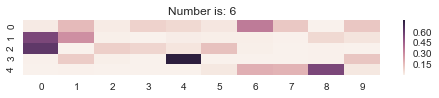

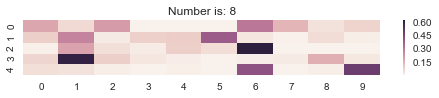

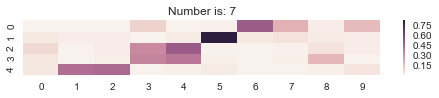

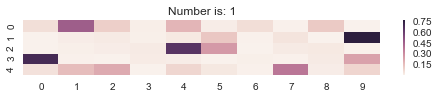

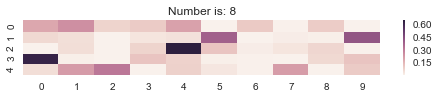

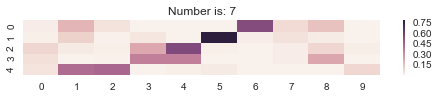

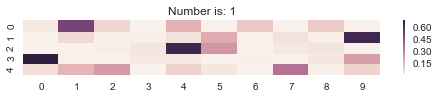

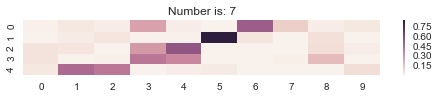

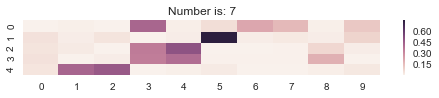

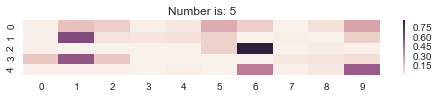

In [97]:
matplotlib.rcParams['figure.figsize'] = 10,10
num_test_digits = 10
# Shuffle g

plot_num = num_test_digits * 100 + 11
for i in range(num_test_digits):
    plt.figure(figsize = (8, 1))
    plt.title('Number is: '+str(labels[i]))
    sns.heatmap(gates[i,:,:])


In [98]:
# Compute cosine similarity
gate_vectors = np.reshape(gates[:num_test_digits,:,:], (num_test_digits, parameter_dict['L']*parameter_dict['M']))
gate_vectors = np.transpose(gate_vectors)

trial = 2
output = np.zeros(num_test_digits)
for i in range(num_test_digits):
    a = gate_vectors[trial][:]
    b = gate_vectors[i][:]
    an = a/np.linalg.norm(a)
    bn = b/np.linalg.norm(b)
    output[i] = np.dot(an,bn)

print(output)
elems = np.argsort(output)
print(elems[::-1])

[ 0.80285859  0.64871322  1.          0.11249485  0.56049633  0.42418346
  0.46391945  0.39512222  0.70391961  0.4718465 ]
[2 0 8 1 4 9 6 5 7 3]


In [99]:
# Close all figures (so they don't stay open in memory)
plt.close('all')

## t-SNE of the gates
<br>

In [100]:
gates_reshaped = np.reshape(gates, [gates.shape[0], -1])
print(gates_reshaped.shape) # sanity check
independent_labels = list(set(labels))
print(independent_labels) # sanity check

# TSNE Vis
#model = TSNE()
# PCA Vis
model = PCA()

x = model.fit_transform(gates_reshaped)
y = labels

(100, 50)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


(32, 50)
(17, 50)
(15, 50)
(32, 32)


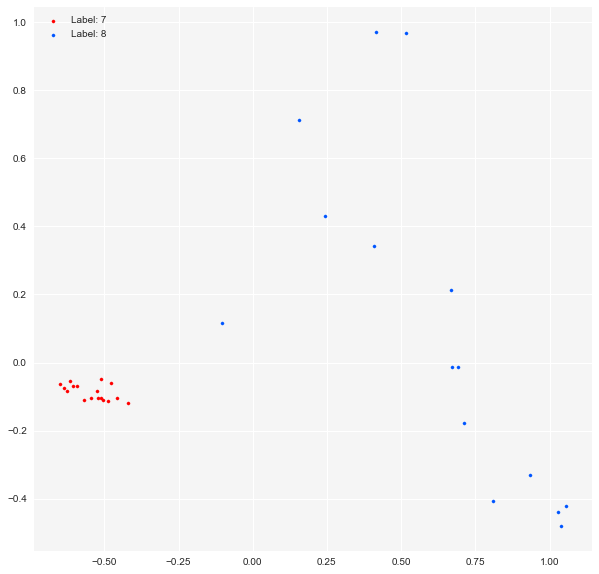

In [101]:

# Comparing 7 and 8
mask7 = y == 7
mask8 = y == 8
reshaped7 = gates_reshaped[mask7]
sevs = len(reshaped7)
reshaped8 = gates_reshaped[mask8]
r78 = np.concatenate((reshaped7, reshaped8), axis=0)
print(r78.shape)
print(reshaped7.shape)
print(reshaped8.shape)

x78 = model.fit_transform(r78)
print(x78.shape)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x78[:17,0], x78[:17,1], s=10, c='#ff0000', label='Label: 7')
ax1.scatter(x78[17:,0], x78[17:,1], s=10, c='#0055ff', label='Label: 8')
plt.legend(loc='upper left');
plt.show()


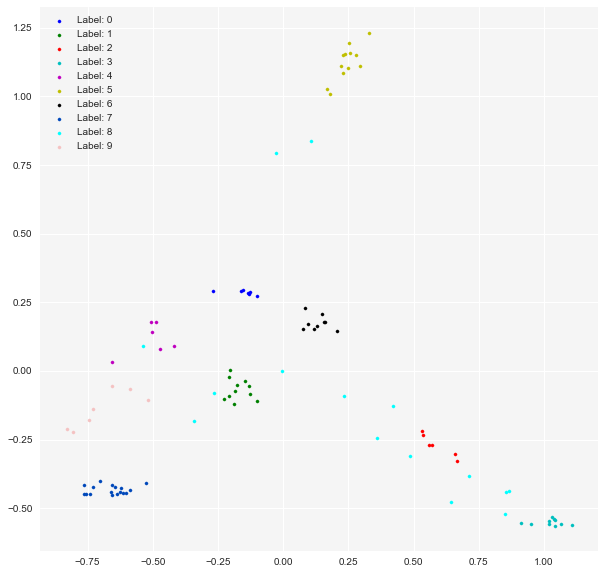

In [104]:
plt.rcParams['axes.facecolor'] = '#f5f5f5f5'

# Add more colors if doing something other than MNIST
colors = ['b','g','r','c','m','y','k','#0048BA','#00FFFF','#F4C2C2']

fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in (independent_labels):
    mask_i = y == i
    x_i = x[mask_i]
    ax1.scatter(x_i[:,0], x_i[:,1], s=10, c=colors[i], label='Label: '+str(i))
plt.legend(loc='upper left');
plt.show()